In [166]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime as dt
from warnings import simplefilter
simplefilter('ignore')
yf.pdr_override()

In [167]:
df = yf.download('^GSPC', start='2017-01-01', end='2022-12-31')
df = df[['Close']]
df = df.dropna()

[*********************100%***********************]  1 of 1 completed


In [168]:
# Calculate five year annual return value
initial_value = df['Close'][:1][0]
final_value = df['Close'][-1:][0]
time_period = 2022 - 2017
annual_return = ((final_value / initial_value) ** (1 / time_period)) - 1
five_year_annual_return = annual_return.round(2)

In [169]:
# Set expected annual volatility rate
annual_volatility = 0.2

In [170]:
# Set how many years to simulate
years = 1

In [171]:
# Set number of simulations
num_simulations = 1000

In [172]:
# Set initial investment value
# in this case it's the same as today value
initial_investment = final_value

In [174]:
# Calculate returns (252 trading days in a year) 
returns = np.random.normal(annual_return/252, annual_volatility/np.sqrt(252), (years*252, num_simulations))

# Calculate cumulative returns for each simulation
cumulative_returns = np.cumprod(1 + returns, axis=0)

# Accumulate the returns into initial investment value
portfolio_values = initial_investment * cumulative_returns

In [176]:
# Calculate value at risk and conditional value at risk
var = np.percentile(cumulative_returns, 5)
below_var = cumulative_returns <= var
cvar = cumulative_returns[below_var].mean()
var = initial_investment*var 
cvar = initial_investment*cvar

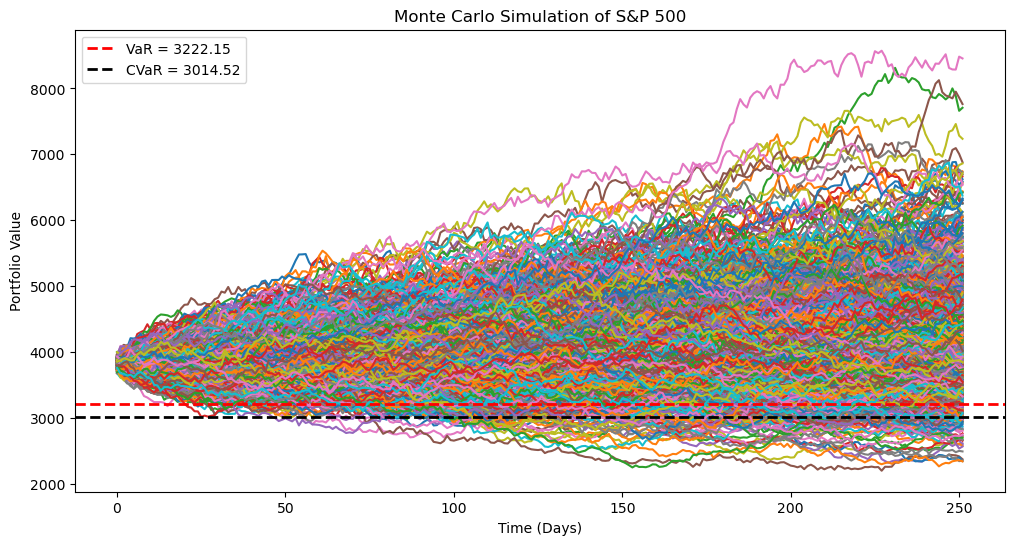

In [196]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values)
plt.axhline(var, linewidth=2, linestyle = '--', color='red', label=f'VaR = {var:.2f}')
plt.axhline(cvar, linewidth=2, linestyle='--', color='black', label=f'CVaR = {cvar:.2f}')
plt.title('Monte Carlo Simulation of S&P 500')
plt.xlabel('Time (Days)')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show();